In [10]:
import pandas as pd
loc47= pd.read_csv('47-17.01.29-02.04.csv')
print(loc47)

     Unnamed: 0   Unnamed: 1            Unnamed: 2 Unnamed: 3  \
0           NaN          NaN                   NaN        NaN   
1           NaN     SITE NO:  47 - Inverleith Park        NaN   
2           NaN        Date:              29/01/17        NaN   
3           NaN   Direction:                              NaN   
4           NaN          NaN                   NaN        NaN   
5           NaN         Hour                   P/C    P/C Kph   
6           NaN  00.00-00.59                     0          0   
7           NaN  01.00-01.59                     0          0   
8           NaN  02.00-02.59                     0          0   
9           NaN  03.00-03.59                     0          0   
10          NaN  04.00-04.59                     0          0   
11          NaN  05.00-05.59                     0          0   
12          NaN  06.00-06.59                     1         26   
13          NaN  07.00-07.59                     5         18   
14          NaN  08.00-08

In [11]:
loc47 = loc47.rename(columns={'Unnamed: 1': 'Hour', 'Unnamed: 2': 'P/C', 'Unnamed: 3': 'P/C Kph', 'DAILY FLOW BY HOUR': 'Ped', 'Unnamed: 5': 'Total'})
print('Inverleith Park - DAILY FLOW BY HOUR')
loc47.drop(loc47.index[[0,1,2,3,4,5]], inplace=True)
loc47.drop(loc47.columns[[0,5]], axis=1, inplace=True)
loc47.index = loc47.index - 6
newcols = {
    'P/C': 'Bike Counts', 
    'P/C Kph': 'Bike Speed', 
    'Ped': 'Pedestrian Counts'
}
loc47.rename(columns=newcols, inplace=True)
loc47

Inverleith Park - DAILY FLOW BY HOUR


,Hour,Bike Counts,Bike Speed,Pedestrian Counts
0,00.00-00.59,0,0,1
1,01.00-01.59,0,0,0
2,02.00-02.59,0,0,0
3,03.00-03.59,0,0,0
4,04.00-04.59,0,0,0
5,05.00-05.59,0,0,0
6,06.00-06.59,1,26,1
7,07.00-07.59,5,18,2
8,08.00-08.59,1,19,2
9,09.00-09.59,2,18,13


In [12]:
loc47['Hourstarts'] = loc47.Hour.str.split('-').str.get(0)
loc47['Hourends'] = loc47.Hour.str.split('-').str.get(1)
loc47.drop(loc47.columns[0], axis=1, inplace=True)

In [13]:
loc47.to_csv('Loc47.csv')
loc47 = loc47.dropna(how='all')
loc47 = loc47[loc47.Hourstarts != "Direction:"]
loc47 = loc47[loc47.Hourstarts != "Total"]
loc47 = loc47[loc47.Hourstarts != "Hour"]
loc47 = loc47[loc47.Hourstarts != "Date:"]

In [14]:
pd.options.mode.chained_assignment = None

In [15]:
loc47[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']] = loc47[['Bike Counts','Hourstarts','Hourends','Bike Speed','Pedestrian Counts']].apply(pd.to_numeric)
#

In [16]:
loc47day1 = loc47.iloc[0:24]
loc47day2 = loc47.iloc[24:48]
loc47day3 = loc47.iloc[48:72]
loc47day4 = loc47.iloc[72:96]
loc47day5 = loc47.iloc[96:120]
loc47day6 = loc47.iloc[120:144]
loc47day7 = loc47.iloc[144:168]
#my data is divided into 7 clean sets

In [17]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

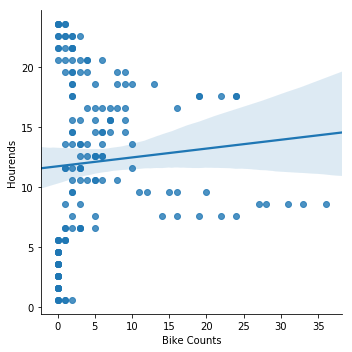

In [18]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47)

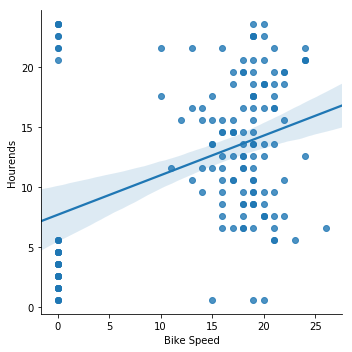

In [42]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47)

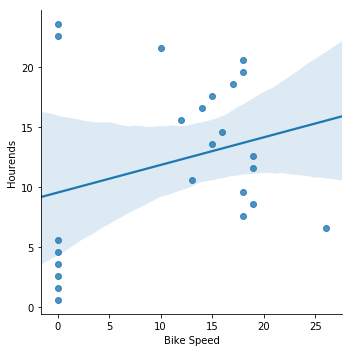

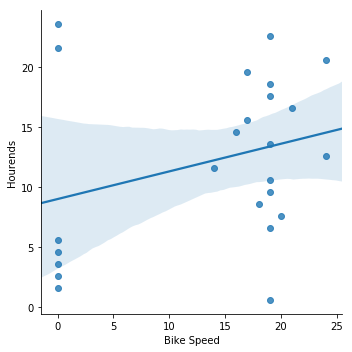

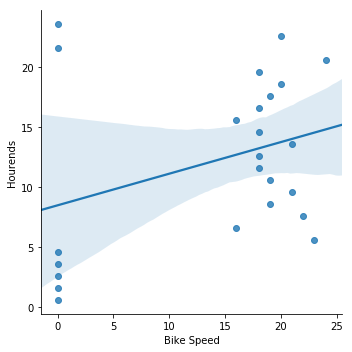

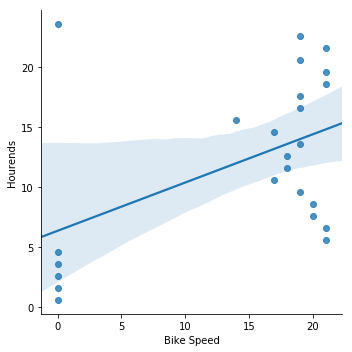

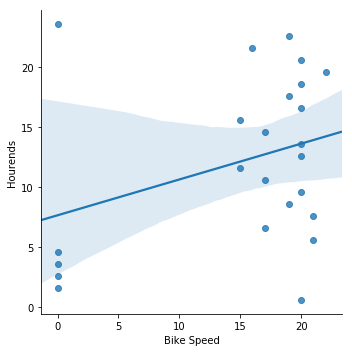

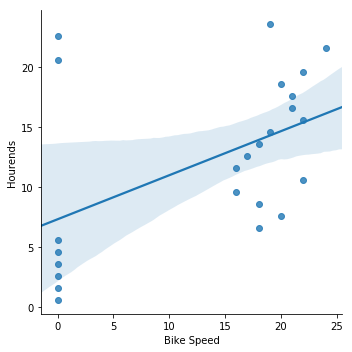

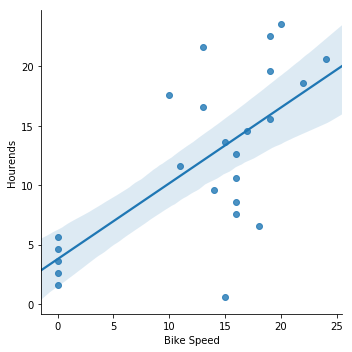

In [20]:
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day1)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day2)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day3)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day4)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day5)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day6)
sns.lmplot(x='Bike Speed',y='Hourends',data=loc47day7)

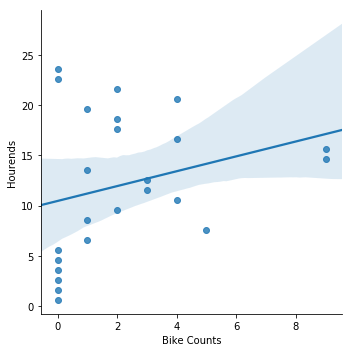

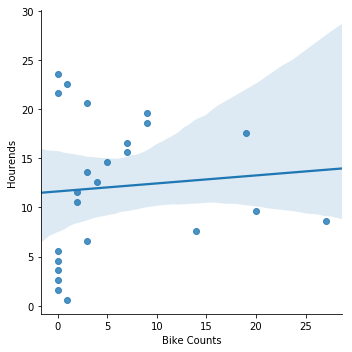

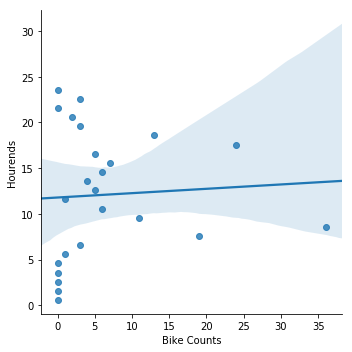

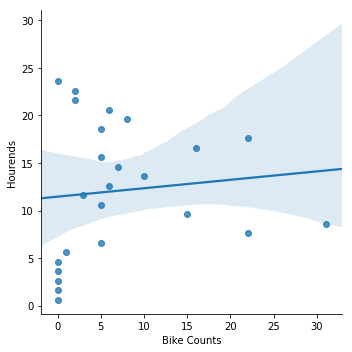

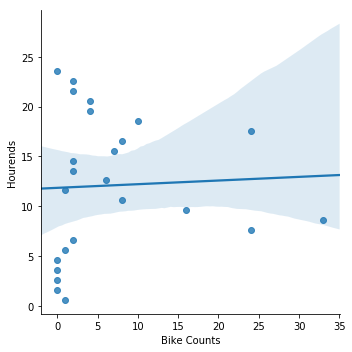

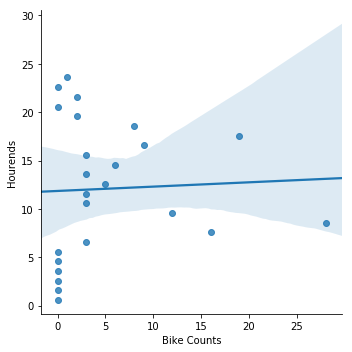

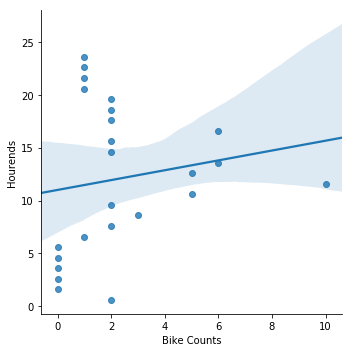

In [21]:
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day1)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day2)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day3)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day4)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day5)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day6)
sns.lmplot(x='Bike Counts',y='Hourends',data=loc47day7)